# CME538 - Feature Selection and Hyper-Parameter Tuning
## Lecture 9.3 - Dimensionality Reduction, Feature Selection, and Hyper-Parameter Tuning

Welcome to **Lecture 9.3**! In this notebook, we’ll explore crucial techniques for improving model performance through **feature selection** and **hyper-parameter tuning**. By the end of this notebook, you'll understand how to streamline your model by selecting only the most important features and optimizing its hyper-parameters for best results.

### What’s This Notebook About?

This notebook is designed to provide a hands-on guide to:
1. **Understanding Dimensionality**: Recognizing the impact of feature count on model performance and the challenges posed by high-dimensional data.
2. **Feature Selection Techniques**: Exploring methods like filter, wrapper, and embedded approaches to reduce dimensionality while retaining important information.
3. **Hyper-Parameter Tuning**: Utilizing techniques like grid search and random search to find the best settings for your model's parameters.

### Why Dimensionality Reduction and Hyper-Parameter Tuning Matter 🛠️

In real-world datasets, we often encounter **high-dimensional** data, which can lead to overfitting, slower training times, and decreased interpretability. By selecting only the most informative features, we improve the model’s performance and interpretability.

Additionally, **hyper-parameter tuning** enables us to optimize model performance by identifying the best configuration for training. Both of these steps are essential in refining models, particularly for large datasets.

### Notebook Structure
This notebook will be divided into four main sections:
1. **[Dimensionality and Feature Selection](#dimensionality-feature-selection)**: Introducing the challenges of high-dimensional data and basic methods for feature selection.
2. **[Feature Selection Techniques](#feature-selection)**: Diving into filter, wrapper, and embedded methods for selecting the most relevant features.
3. **[Hyper-Parameter Tuning](#hyper-parameter-tuning)**: Exploring various approaches to hyper-parameter tuning, including grid search and randomized search.
4. **[Building a Full ML Pipeline](#full-ml-pipeline)**: Creating a complete machine learning pipeline that integrates feature selection and hyper-parameter tuning for robust model building.

Let’s get started and see how these techniques can significantly enhance our models! 🚀

<a id='dimensionality-feature-selection'></a>
## 1. Dimensionality and Feature Selection

In machine learning, the number of features, or **dimensionality**, can significantly impact model performance. High-dimensional data can lead to issues like **overfitting** and slower model training, known as the **curse of dimensionality**. Reducing dimensionality allows us to simplify the model, retain only the most relevant information, and improve both interpretability and efficiency.

### Why Feature Selection?

Feature selection techniques help us:
- **Improve Model Performance** by reducing noise from irrelevant features.
- **Reduce Training Time** by narrowing down the data to the most informative variables.
- **Avoid Overfitting** by decreasing complexity, especially for high-dimensional datasets.

In this section, we’ll explore the basics of dimensionality and its impact on model performance, then apply feature selection techniques to address these issues.

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Create a high-dimensional synthetic dataset
n_samples = 100
n_features = 1000
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=10, random_state=42)

# Scale features to be non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Select the top 10 features
selector = SelectKBest(chi2, k=10)
X_reduced = selector.fit_transform(X_scaled, y)

# Display selected features
selected_features = np.array(range(n_features))[selector.get_support()]
print("Selected Features (Top 10 based on chi-squared):", selected_features)

Selected Features (Top 10 based on chi-squared): [ 64 143 285 501 505 648 808 911 949 981]


### What Did We Learn? 🔍

In this section, we highlighted the importance of dimensionality in machine learning. By generating a synthetic dataset with many features, we observed how overwhelming high-dimensional data can be. 

Using **feature selection** (in this case, a chi-squared test), we identified the 10 most informative features, demonstrating how feature selection can simplify models and enhance performance. By focusing on relevant variables, we reduce the noise from less informative features, improving model interpretability and efficiency.

In the next section, we’ll apply various feature selection techniques and see how each method tackles the challenge of high-dimensional data differently.

<a id='feature-selection'></a>
## 2. Feature Selection: Reducing Model Complexity 🧩

Feature selection is a crucial step in machine learning that helps in:
- **Reducing Complexity**: By focusing only on the most relevant features, we can make our models simpler and faster.
- **Improving Interpretability**: Fewer features mean clearer insights into which factors most impact the predictions.
- **Avoiding Overfitting**: By reducing the number of features, we lessen the chances of the model capturing noise rather than the underlying patterns in the data.

In this section, we’ll use `SelectKBest` with the chi-squared scoring function to select the top 10 features. To ensure compatibility with chi-squared, which requires non-negative values, we’ll apply a scaling transformation to our features.

Selected Features: Index(['feature_103', 'feature_1030', 'feature_1525', 'feature_2192',
       'feature_2578', 'feature_2585', 'feature_3515', 'feature_3548',
       'feature_4678', 'feature_4928'],
      dtype='object')


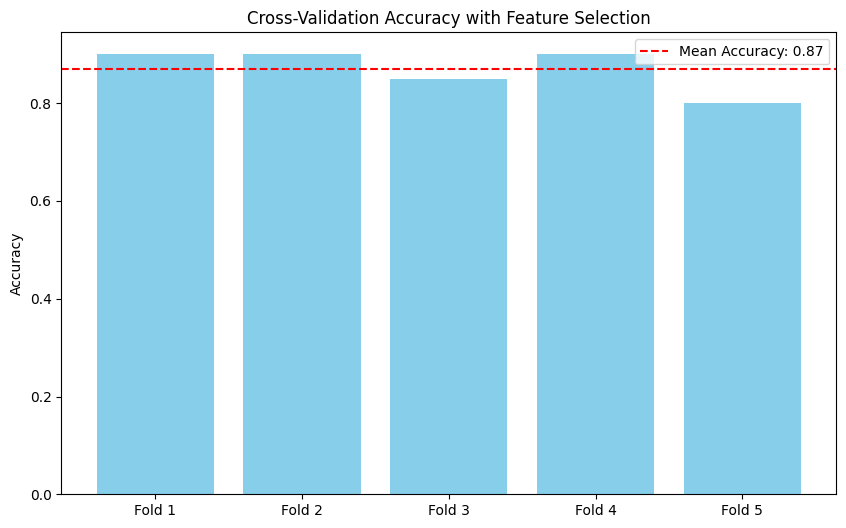

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Define the synthetic dataset with column names
n_rows = 100
n_features = 5000
X = pd.DataFrame(np.random.uniform(low=0, high=10, size=(n_rows, n_features)),
                 columns=[f'feature_{i}' for i in range(n_features)])
y = pd.DataFrame(np.array([np.random.rand() > .5 for _ in range(n_rows)]).astype(int), columns=['target'])

# Scale data to be non-negative for chi2 compatibility
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Select top 10 features with SelectKBest using chi2
selector = SelectKBest(chi2, k=10)
X_reduced = selector.fit_transform(X_scaled, y)

# Retrieve selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Initialize model and cross-validation
model = LogisticRegression(penalty=None) 
kf = KFold(n_splits=5)
accuracy_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X_reduced):
    X_train, X_test = X_reduced[train_index], X_reduced[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot cross-validation results
labels = [f'Fold {i+1}' for i in range(kf.get_n_splits())]
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy_scores, color='skyblue')
plt.axhline(y=np.mean(accuracy_scores), color='red', linestyle='--', label=f'Mean Accuracy: {np.mean(accuracy_scores):.2f}')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy with Feature Selection')
plt.legend()
plt.show()

### Conclusion: Impact of Feature Selection 📉

By applying feature selection:
- **Reduced Complexity**: We focused on the most informative features, streamlining our model.
- **Improved Performance Consistency**: Using only the top features reduced the model's susceptibility to noise, which is especially beneficial in cross-validation.
- **Enhanced Model Interpretability**: By selecting key features, we gained insights into which attributes play the most significant role in our predictions.

Feature selection proves to be a powerful tool in managing overfitting and simplifying models, making them more generalizable and easier to interpret.

<a id='hyper-parameter-tuning'></a>
## 3. Hyper-Parameter Tuning

In this section, we’ll explore **hyper-parameter tuning**, a critical step in optimizing machine learning models. Hyper-parameters, unlike model parameters, are not learned from the data but are set before training begins. They control aspects of the model, such as regularization, the number of layers, or the choice of kernel in SVM, and have a significant impact on model performance.

### Why Hyper-Parameter Tuning Matters

Hyper-parameter tuning allows us to find the best combination of model settings to improve performance. By carefully selecting these settings, we can:
- **Enhance Model Accuracy**: By finding the optimal configuration, we can boost accuracy on test data.
- **Control Bias and Variance**: Tuning parameters like regularization or tree depth can balance model complexity and generalization ability.
- **Reduce Training Time**: Efficient tuning prevents unnecessary calculations by focusing on the most promising parameters.

### Approaches to Hyper-Parameter Tuning

Two popular methods for hyper-parameter tuning are:
1. **Grid Search**: This method exhaustively tries every combination of specified parameters, ensuring that we find the best settings but potentially taking more time.
2. **Randomized Search**: Randomly samples parameter values within a specified distribution, offering a faster, more scalable option that still delivers near-optimal performance.

In this section, we’ll use both grid and randomized search to optimize our model and compare their effectiveness. By the end, we’ll see how fine-tuning parameters can lead to a more robust, high-performing model.

Best parameters from Grid Search: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1'}
Best accuracy from Grid Search: 0.8700000000000001


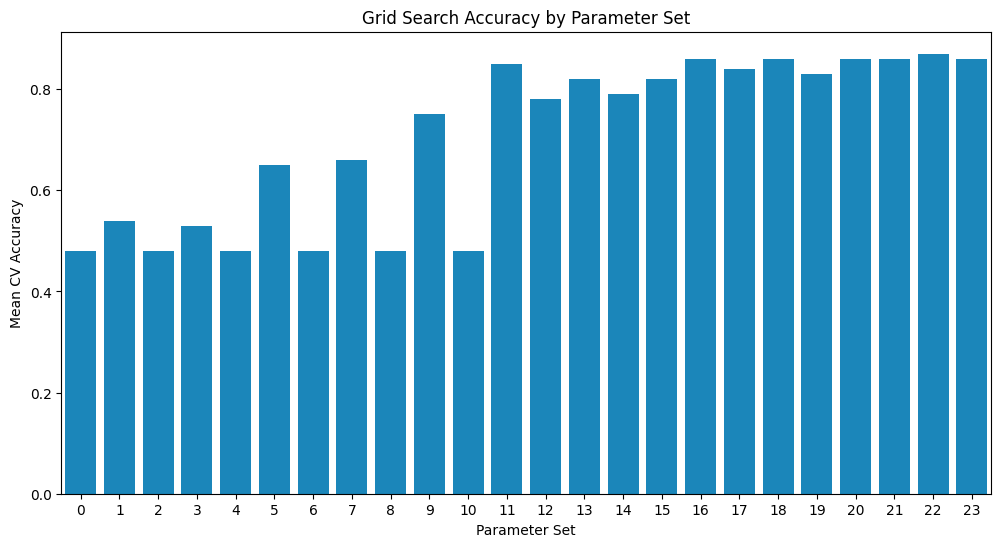

Best parameters from Randomized Search: {'C': np.float64(67.32248920775338), 'class_weight': 'balanced', 'penalty': 'l2'}
Best accuracy from Randomized Search: 0.86


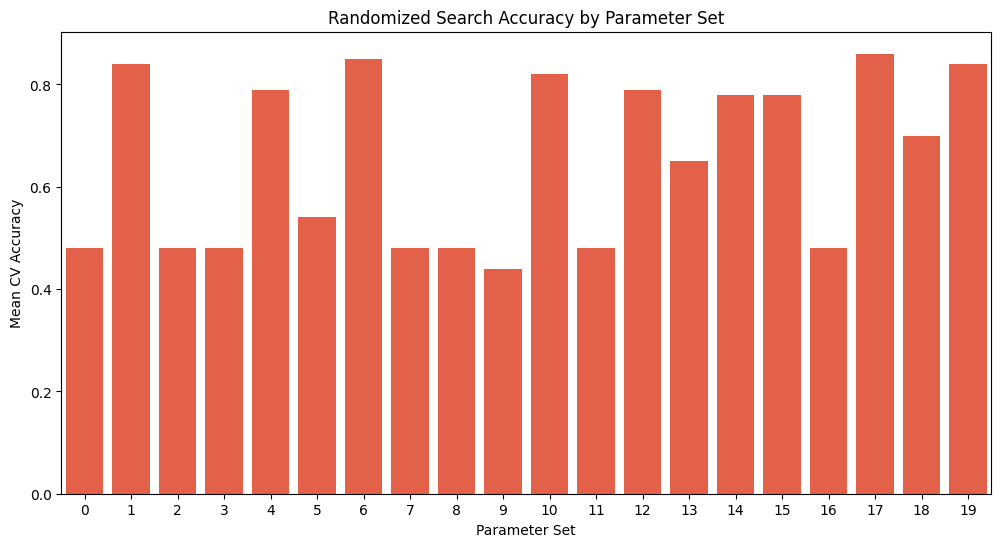

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Define the model
model = LogisticRegression(solver='liblinear')

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define hyper-parameter grids
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_reduced, y)

# Display Grid Search results
print(f"Best parameters from Grid Search: {grid_search.best_params_}")
print(f"Best accuracy from Grid Search: {grid_search.best_score_}")

# Plot results
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(12, 6))
sns.barplot(x=results.index, y='mean_test_score', data=results, color='#008fd5')
plt.xlabel('Parameter Set')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search Accuracy by Parameter Set')
plt.show()

# Randomized Search
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': loguniform(0.001, 100),
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=cv, random_state=42)
random_search.fit(X_reduced, y)

# Display Randomized Search results
print(f"Best parameters from Randomized Search: {random_search.best_params_}")
print(f"Best accuracy from Randomized Search: {random_search.best_score_}")

# Plot results
results_random = pd.DataFrame(random_search.cv_results_)
plt.figure(figsize=(12, 6))
sns.barplot(x=results_random.index, y='mean_test_score', data=results_random, color='#fc4f30')
plt.xlabel('Parameter Set')
plt.ylabel('Mean CV Accuracy')
plt.title('Randomized Search Accuracy by Parameter Set')
plt.show()

### What Did We Learn? 🧐

In this section, we successfully explored **hyper-parameter tuning** using both **grid search** and **randomized search**. Here’s what each technique provided:

- **Grid Search**: This exhaustive search evaluated all parameter combinations, allowing us to identify the exact configuration that achieved the best accuracy. However, it can be time-consuming with large parameter spaces.

- **Randomized Search**: Instead of testing every combination, this search method sampled from the parameter space, offering a faster approach with nearly comparable results for large datasets.

Overall, both techniques enable us to fine-tune our model’s parameters, significantly enhancing performance. In practice, **randomized search** is often preferred for large or complex parameter grids due to its efficiency, while **grid search** remains useful for smaller, more focused parameter spaces.

In the next section, we’ll integrate feature selection and hyper-parameter tuning into a **full ML pipeline** for a streamlined approach to model building.

<a id='full-ml-pipeline'></a>
## 4. Building a Full ML Pipeline 🔧

In this section, we’ll create a comprehensive machine learning pipeline that combines **feature selection** and **hyper-parameter tuning**. 

Using this approach, we:
1. **Select the most relevant features** to improve model interpretability and performance.
2. **Optimize hyper-parameters** to enhance the model’s predictive accuracy.

By integrating these steps into a single pipeline, we ensure our model is efficient, robust, and less prone to overfitting or underfitting.

Best parameters: {'feature_selection__k': 5, 'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l2'}
Best accuracy: 0.5


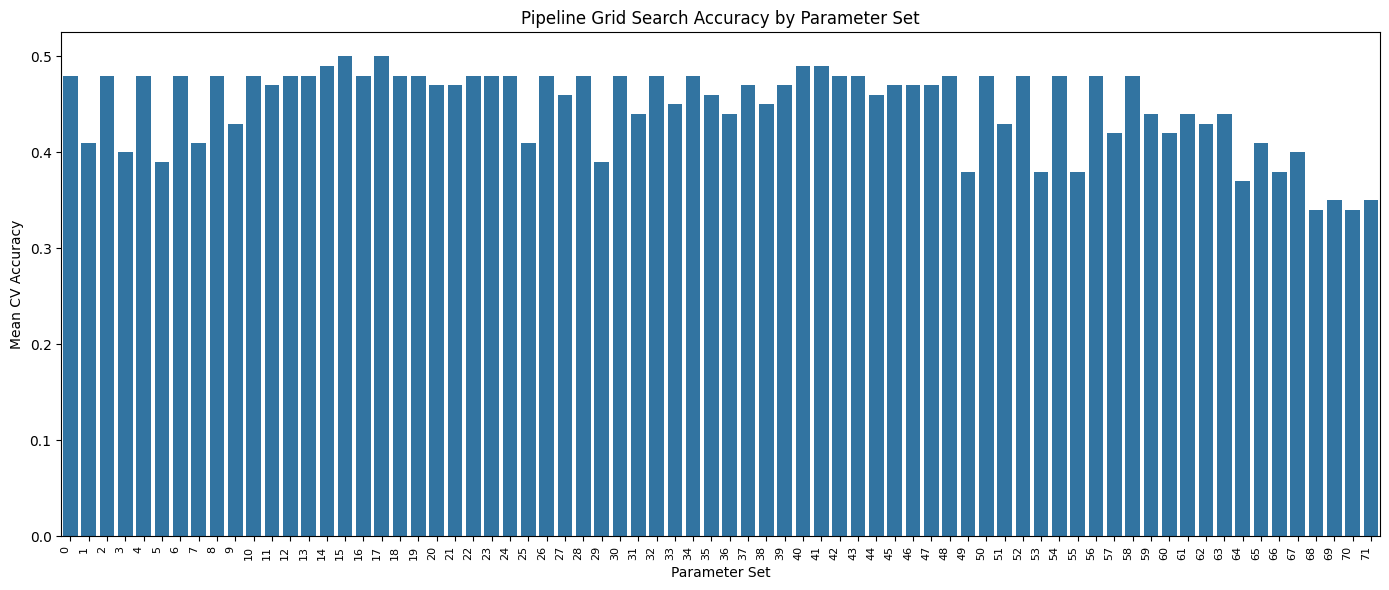

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform

# Scale features, select top features, and then apply Logistic Regression with hyper-parameter tuning
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale features
    ('feature_selection', SelectKBest(chi2)),  # Feature selection step
    ('model', LogisticRegression(solver='liblinear'))  # Logistic Regression model
])

# Define parameter grid for GridSearchCV
param_grid = {
    'feature_selection__k': [5, 10, 15],  # Number of features to select
    'model__penalty': ['l1', 'l2'],  # Regularization types
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'model__class_weight': [None, 'balanced']
}

# Set up cross-validation and GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=cv)

# Fit the pipeline with GridSearch
grid_search.fit(X, y.values.ravel())

# Display results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

# Plot results 
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(14, 6))
sns.barplot(x=results.index, y='mean_test_score', data=results)
plt.xlabel('Parameter Set')
plt.ylabel('Mean CV Accuracy')
plt.title('Pipeline Grid Search Accuracy by Parameter Set')

# Rotate x-axis labels and format them for readability
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()  # Adjust layout to ensure all labels fit
plt.show()

### What Did We Achieve? 🎉

In this final section, we built a **full ML pipeline** integrating feature selection and hyper-parameter tuning into a single streamlined process. This approach provides multiple benefits:

- **Efficiency**: Automating feature selection and model tuning saves time and ensures consistency.
- **Optimal Performance**: By tuning hyper-parameters and selecting only the most relevant features, we achieve better model performance.
- **Scalability**: Pipelines make it easier to scale and adapt the workflow to larger datasets or different machine learning models.

By mastering these techniques, you’re now equipped to build machine learning models that are not only accurate but also optimized for real-world deployment!